In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


# Exploratory Data Analysis (EDA)

## Pandas
### Download data
* .csv (Comma Separated Files) [pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
* .xls (eXceL Spreadsheet) [pandas.read_excel()](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)
* .json (JavaScript Object Notation) [pandas.read_json()](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
* .txt

Save .csv file from https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv

In [167]:
!wget https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv

--2024-01-23 20:05:46--  https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61205 (60K) [text/plain]
Saving to: ‘data_sem1.csv.1’

data_sem1.csv.1     100%[===================>]  59.77K  --.-KB/s    in 0.02s   

2024-01-23 20:05:46 (3.66 MB/s) - ‘data_sem1.csv.1’ saved [61205/61205]



In [168]:
!ls

data_sem1.csv  data_sem1.csv.1	ML1.pdf  ML2.ipynb  ML3.ipynb  ML4.ipynb


In [169]:
Data = pd.read_csv("data_sem1.csv", sep=";")
#Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv", sep=";")

In [170]:
Data.head() #tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


## Working with DataFrame object:
Column names

In [171]:
Data.columns #.values

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [172]:
for i in Data.columns:
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [173]:
# d = dict(zip(df.columns.values[[0,1,2,4,5]], [np.int32, np.float32, np.float32, np.float32, np.int32]))
# df2 = pd.read_csv(PATH, dtype=d)
# df2.info()

Rows names

In [174]:
Data.index

RangeIndex(start=0, stop=891, step=1)

Access by index

In [175]:
Data.iloc[Data.index % 2 == 0].head(5)
Data.iloc[1,2]

1

Access by names

In [176]:
Data.loc[0,'Name']

'Braund; Mr. Owen Harris'

In [177]:
Data_indexed = Data.set_index('Name')

In [178]:
Data_indexed.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
Braund; Mr. Owen Harris,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
Cumings; Mrs. John Bradley (Florence Briggs Thayer),2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
Heikkinen; Miss. Laina,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
Futrelle; Mrs. Jacques Heath (Lily May Peel),4,1,1,female,35.0,1,0,113803,53.1000,C123,S
Allen; Mr. William Henry,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
Data_indexed.loc['Braund; Mr. Owen Harris']

PassengerId            1
Survived               0
Pclass                 3
Sex                 male
Age                 22.0
SibSp                  1
Parch                  0
Ticket         A/5 21171
Fare                7.25
Cabin                NaN
Embarked               S
Name: Braund; Mr. Owen Harris, dtype: object

**1.** Look at the shape of data

In [180]:
Data.shape

(891, 12)

**2.** Information about numerical features

In [181]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**3.** Information about all features

In [182]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**4.** Get information about columns

Survived

In [183]:
Data.Survived.value_counts(dropna=False)  #Data.Survived  is the same as Data['Survived']

Survived
0    549
1    342
Name: count, dtype: int64

Pclass

In [184]:
Data['Pclass'].value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex

In [185]:
Data['Sex'].value_counts(dropna=False)

Sex
male       574
female     312
unknown      5
Name: count, dtype: int64

How to handle 'Sex'?

In [186]:
Data[Data.Sex == 'unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


Assing manually

In [187]:
Data.loc[[5, 13], 'Sex'] = 'male'
#Data.iloc[[5, 13], 4]

**5.** Is the sex an important feature?

<Axes: xlabel='Sex'>

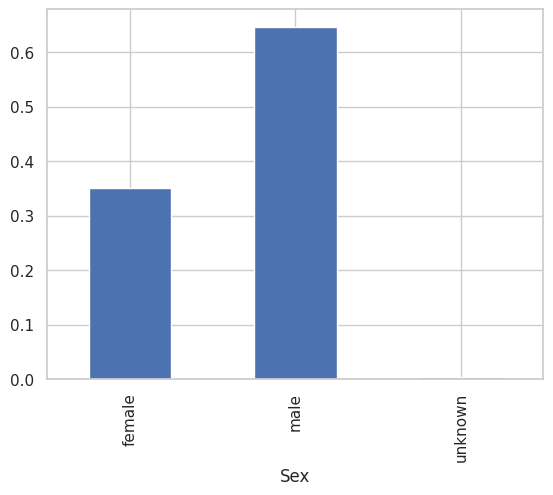

In [188]:
# Data.groupby('Sex').mean()['Survived'].plot.bar() # Incorrect because of the mean used instead of the normalized count
(Data.groupby('Sex').count()['Survived']/len(Data)).plot.bar()

/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Sex', ylabel='Survived'>

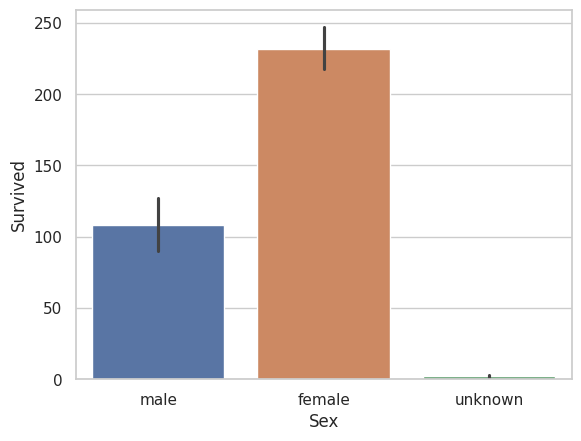

In [189]:
sns.set_theme(style="whitegrid")
# sns.barplot(x="Sex", y="Survived", hue='Pclass', data=Data)
sns.barplot(x="Sex", y="Survived", hue='Sex', estimator='sum', data=Data)
# sns.barplot(x="Sex", y="Survived", hue='Sex', estimator=lambda x: sum(x)/len(Data), data=Data)

**6.** Delete records with unknown sex

In [190]:
Data.drop(index = Data[Data.Sex == 'unknown'].index, inplace=True)

**7.** Encode column Sex

In [191]:
# Data['Sex'] = Data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
# # Data['Sex'] = Data['Sex'].map({'male': 1, 'female': 0})
# Data.replace({'Sex': {'male': 1, 'female': 0}}, inplace = True)
# Data.head()

## Use OneHotEncoder

In [192]:
from sklearn.preprocessing import OneHotEncoder

In [193]:
onee = OneHotEncoder(drop='first')

In [194]:
onee.fit(Data[['Sex']])
# Data.Sex = onee.fit_transform(Data[['Sex']]).toarray()

OneHotEncoder(drop='first')

In [195]:
onee.categories_

[array(['female', 'male'], dtype=object)]

In [196]:
Data.Sex = onee.fit_transform(Data[['Sex']]).toarray()

In [197]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S


**8.** Explore next column 'Age'

In [198]:
Data[Data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,1.0,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,Williams; Mr. Charles Eugene,1.0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,Masselmani; Mrs. Fatima,0.0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,Emir; Mr. Farred Chehab,1.0,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,Todoroff; Mr. Lalio,1.0,NaN,0,0,349216,7.8958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,Razi; Mr. Raihed,1.0,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage; Miss. Dorothy Edith ""Dolly""",0.0,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,van Melkebeke; Mr. Philemon,1.0,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,Laleff; Mr. Kristo,1.0,NaN,0,0,349217,7.8958,NaN,S


<Axes: ylabel='Frequency'>

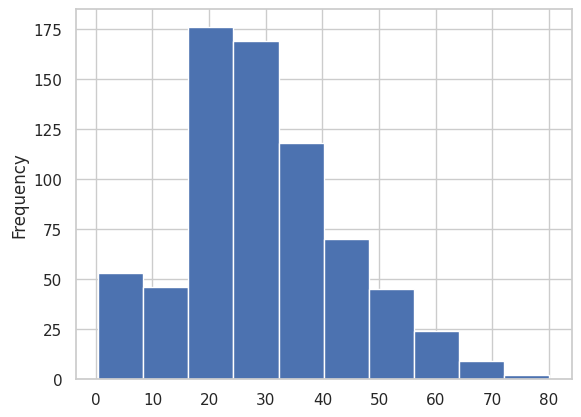

In [199]:
Data['Age'].plot.hist()
#sns.displot(Data.Age, kde=True)

In [200]:
median_age = Data['Age'].median()
mean_age = Data['Age'].mean()
print(f'Median = {median_age},\nMean = {mean_age}')

Median = 28.0,
Mean = 29.756095505617978


In [201]:
#Data.loc[Data[Data['Age'].isna()].index, 'Age'] = mean_age
#Data['Age'].fillna(mean_age, inplace=True)
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
Data['Age'] = imp.fit_transform(Data[['Age']])

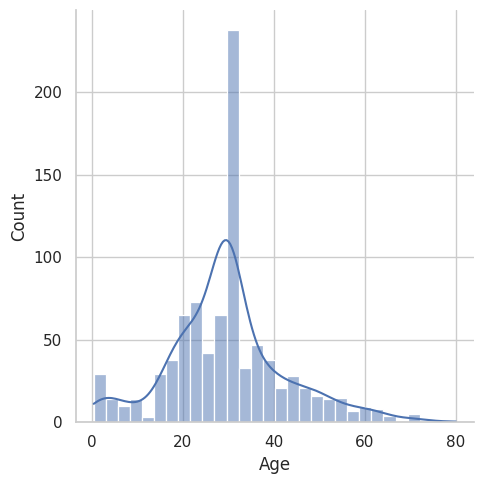

In [202]:
sns.displot(Data.Age, kde=True)

**9.** Feature Embarked
#Problem 1. Analyze this feature

In [203]:
Data[Data["Embarked"].isna()]
Data["Embarked"].value_counts(dropna=False)

Embarked
S      642
C      168
Q       76
NaN      2
Name: count, dtype: int64

In [204]:
Data.drop(index= Data[Data.Embarked == "NaN"].index, inplace =True)

/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Embarked', ylabel='Survived'>

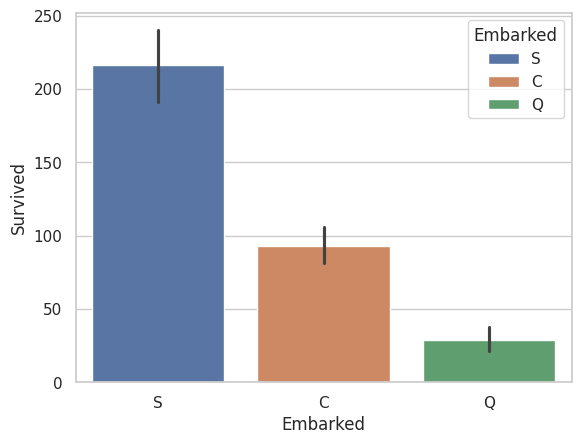

In [205]:
Data.head()
sns.barplot(x="Embarked", y="Survived", hue='Embarked', estimator='sum', data=Data)


**10.** 'SibSp'
#Problem 2. Analyze this feature

In [206]:
Data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/se

<Axes: xlabel='SibSp', ylabel='Survived'>

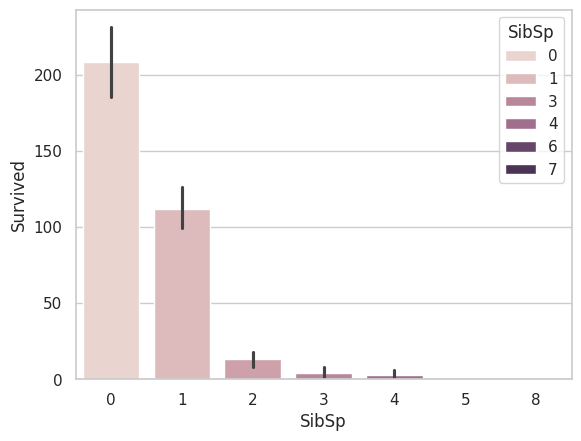

In [207]:
sns.barplot(x="SibSp", y="Survived", hue='SibSp', estimator='sum', data=Data)

**11.** 'Parch'
#Problem 3. Analyze this feature

In [208]:
Data["Parch"].value_counts(dropna=False)

Parch
0    676
1    118
2     79
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='Survived'>

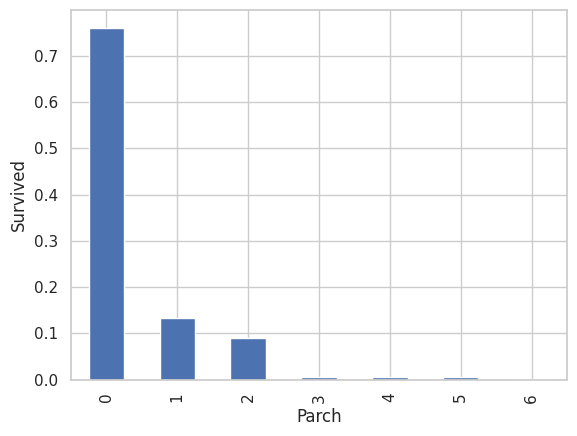

In [209]:
# sns.barplot(x="Parch", y="Survived", hue='Parch', estimator='sum', data=Data)

#Data['Parch'].plot.hist()

(Data.groupby('Parch').count()['Survived']/len(Data)).plot.bar(ylabel='Survived')

**12** 'Cabin'
#Problem 4. Analyze this feature

In [210]:
Data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/tohab0g/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


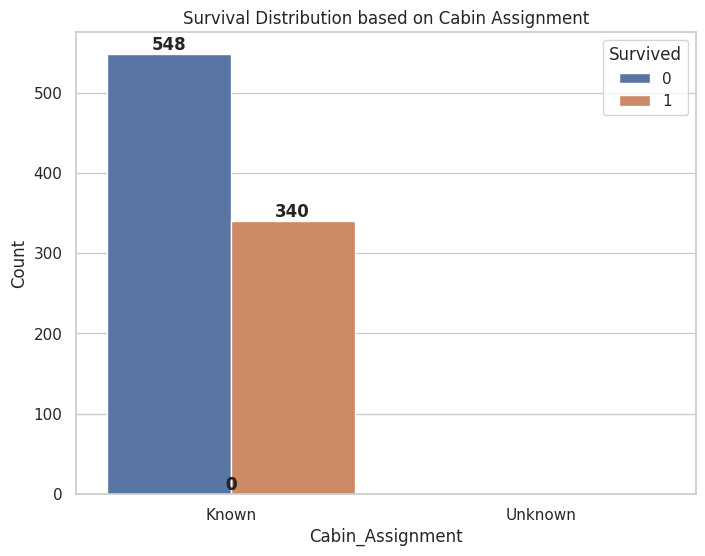

In [266]:
# filtered_data = Data[Data['Cabin'].notna()] # to filter out NaN entries

Data['Cabin_Assignment'] = Data['Cabin'].apply(lambda x: 'Known' if pd.notna(x) else 'Unknown')

# A count plot to visualize the relationship between Cabin assignment and survival
plt.figure(figsize=(8, 6))

# Set labels for the x-axis ticks with adjusted position
tick_positions = [0, 1]
tick_labels = ['Known', 'Unknown']
plt.xticks(tick_positions, tick_labels)


plot = sns.countplot(x='Cabin_Assignment', hue='Survived', data=Data)

# Add labels underneath the bars
for i,p in enumerate(plot.patches):
    plot.text(p.get_x() + p.get_width() / 2, p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontweight='bold')
    
plt.title('Survival Distribution based on Cabin Assignment')
plt.xlabel('Cabin_Assignment')
plt.ylabel('Count')
plt.show()


# One-Hot Encoder VS Ordinal Encoder (Label Encoder)
[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [92]:
#le = preprocessing.LabelEncoder()   #Use for y
from sklearn.preprocessing import OrdinalEncoder   #Use for X
#from sklearn.preprocessing import OneHotEncoder

In [93]:
onee.fit_transform(Data[['Embarked']]).toarray()

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [94]:
onee.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

In [95]:
Data[onee.categories_[0][1:]] = onee.fit_transform(Data[['Embarked']]).toarray()

In [131]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1.0,35.0,0,0,373450,8.0500,NaN,S


##Features and Target Isolation

In [ ]:
y = Data['Survived']
X = Data.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket','Cabin', "Embarked"])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
149,2,1.0,42.000000,0,0,13.0000,0.0,1.0
238,2,1.0,19.000000,0,0,10.5000,0.0,1.0
224,1,1.0,38.000000,1,0,90.0000,0.0,1.0
365,3,1.0,30.000000,0,0,7.2500,0.0,1.0
384,3,1.0,29.756096,0,0,7.8958,0.0,1.0


## Model Selection


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
sum(y_test == y_pred)/len(y_test)

0.7030716723549488